## LABORATORY 04: MACHINE LEARNING II - CLASSIFICATION PROBLEM

### Case of Study: Employee Attrition Classification

The Synthetic Employee Attrition Dataset is a simulated dataset designed for the analysis and prediction of employee attrition. It contains detailed information about various aspects of an employee's profile, including demographics, job-related features, and personal circumstances.
The dataset contains 24 columns and 74 498 rows.

***FEATURES***:

- **Employee ID:** A unique identifier assigned to each employee.
- **Age:** The age of the employee, ranging from 18 to 60 years.
- **Gender:** The gender of the employee
- **Years at Company:** The number of years the employee has been working at the company.
- **Monthly Income:** The monthly salary of the employee, in dollars.
- **Job Role:** The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.
- **Work-Life Balance:** The employee's perceived balance between work and personal life, (Poor, Below Average, Good, Excellent)
- **Job Satisfaction:** The employee's satisfaction with their job: (Very Low, Low, Medium, High)
- **Performance Rating:** The employee's performance rating: (Low, Below Average, Average, High)
- **Number of Promotions:** The total number of promotions the employee has received.
- **Distance from Home:** The distance between the employee's home and workplace, in miles.
- **Education Level:** The highest education level attained by the employee: (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD)
- **Marital Status:** The marital status of the employee: (Divorced, Married, Single)
- **Job Level:** The job level of the employee: (Entry, Mid, Senior)
- **Company Size:** The size of the company the employee works for: (Small,Medium,Large)
- **Company Tenure:** The total number of years the employee has been working in the industry.
- **Remote Work:** Whether the employee works remotely: (Yes or No)
- **Leadership Opportunities:** Whether the employee has leadership opportunities: (Yes or No)
- **Innovation Opportunities:** Whether the employee has opportunities for innovation: (Yes or No)
- **Company Reputation:** The employee's perception of the company's reputation: (Very Poor, Poor,Good, Excellent)
- **Employee Recognition:** The level of recognition the employee receives:(Very Low, Low, Medium, High)

- ***ATTRITION:*** Whether the employee has left the company (Stayed or Left). 

#### 1. Load the dataset

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sbn
import scripts

In [2]:
# load train and test set
dataset = pd.read_csv("dataset/train.csv", sep = ",", low_memory = False)
test_set = pd.read_csv("dataset/test.csv", sep = ",", low_memory = False)
dataset.head(5)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [3]:
# dimensions of dataset
print("#Train-samples = ", dataset.shape[0])
print("#Train-features = ", dataset.shape[1])
print("#Test-samples = ", test_set.shape[0])
print("#Test-features = ", test_set.shape[1])

#Train-samples =  59598
#Train-features =  24
#Test-samples =  14900
#Test-features =  24


---
**Comment**: we can see that train samples has 80% of all samles while test has 20%. That it is one of the best distributions for training and testing.

---

In [4]:
# definition of preprocessor
from scripts.preprocess import DataPreprocessing

dp = DataPreprocessing()
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 24 
 Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')
Numerical features: 
 ['Employee ID', 'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']
Categorical features: 
 ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee 

---
**Comment**: here we can see that all features ware correctly defined as numerical and categorical, there are no features in categorical that should be numerical, so we don't need to alter anything. 

---

#### 2. Data Cleaning

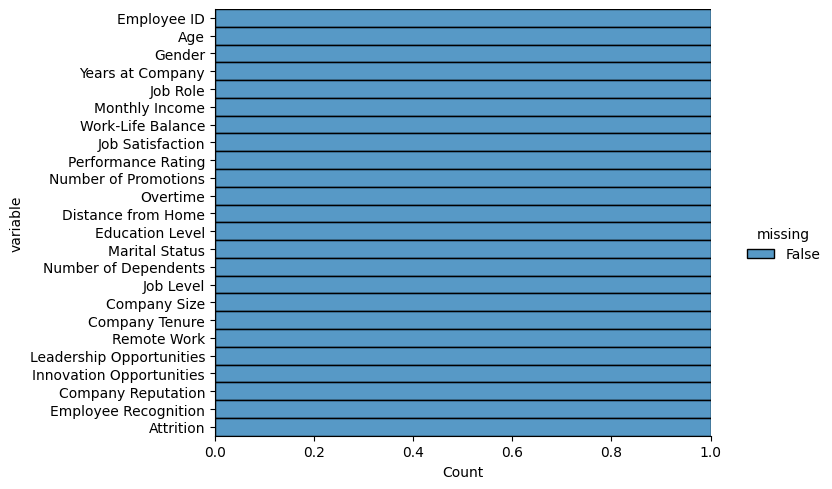

In [5]:
dp.filter_missing(dataset)

---
**Comment:** here we astimated our dataset whether it has missing values for any feature, but everything is fine and we don't have any misses.

---

Clean outliers

In [6]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    return outliers

In [7]:
# cycle to check the number of outliers in each numerical column
for col in num_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in Employee ID ***
#samples outlier to distribution = 2712
%outliers = 4.55 %

*** Outliers detection in Age ***
#samples outlier to distribution = 1346
%outliers = 2.26 %

*** Outliers detection in Years at Company ***
#samples outlier to distribution = 1328
%outliers = 2.23 %

*** Outliers detection in Monthly Income ***
#samples outlier to distribution = 2710
%outliers = 4.55 %

*** Outliers detection in Number of Promotions ***
#samples outlier to distribution = 788
%outliers = 1.32 %

*** Outliers detection in Distance from Home ***
#samples outlier to distribution = 2346
%outliers = 3.94 %

*** Outliers detection in Number of Dependents ***
#samples outlier to distribution = 662
%outliers = 1.11 %

*** Outliers detection in Company Tenure ***
#samples outlier to distribution = 2632
%outliers = 4.42 %


In [8]:
def clean_outliers(frame):
    frame.loc[frame["Age"] > 65, "Age"] = 65
    frame.loc[frame["Num_Bank_Accounts"] > 1000, "Num_Bank_Accounts"] = 1000
    frame.loc[frame["Monthly_Balance"] > 1e6, "Monthly_Balance"] = np.nan
    return frame

---
**Comment:** This function shows the percentages of outliers for numerical featuresю These percentages seems to be not so big so we keep outliers in our dataset.

---

Master function to clean data

In [9]:
cat_cols

['Gender',
 'Job Role',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Overtime',
 'Education Level',
 'Marital Status',
 'Job Level',
 'Company Size',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Company Reputation',
 'Employee Recognition',
 'Attrition']

In [10]:
# function to clean dataset
def clean_data(frame, is_test=False):
    # drop all duplicate values
    frame = frame.drop_duplicates()
    # drop non-important columns
    frame = frame.drop(columns=['Employee ID'], axis=1)
    
    for f in frame.columns:
        if is_test and f == "Attrition":
            break
        if pd.api.types.is_numeric_dtype(frame[f]):
            frame[f] = frame[f].fillna(frame[f].median())
        else:
            frame[f] = frame[f].fillna(frame[f].mode()[0])

    return frame

---
**Comment:** This function cleans our data dropping duplicates because they are not preferable and dropping Employee ID column because it does not has any valuable information for classification.

---

Cleaned dataset

In [11]:
dataset = clean_data(dataset)
dataset.head(5)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


Redefine metadata

In [12]:
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 23 
 Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')
Numerical features: 
 ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']
Categorical features: 
 ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


---
**Comment:** These are correctly defined numerical and categorical features of our dataset.

---

#### 3. Exploratory Data Analysis

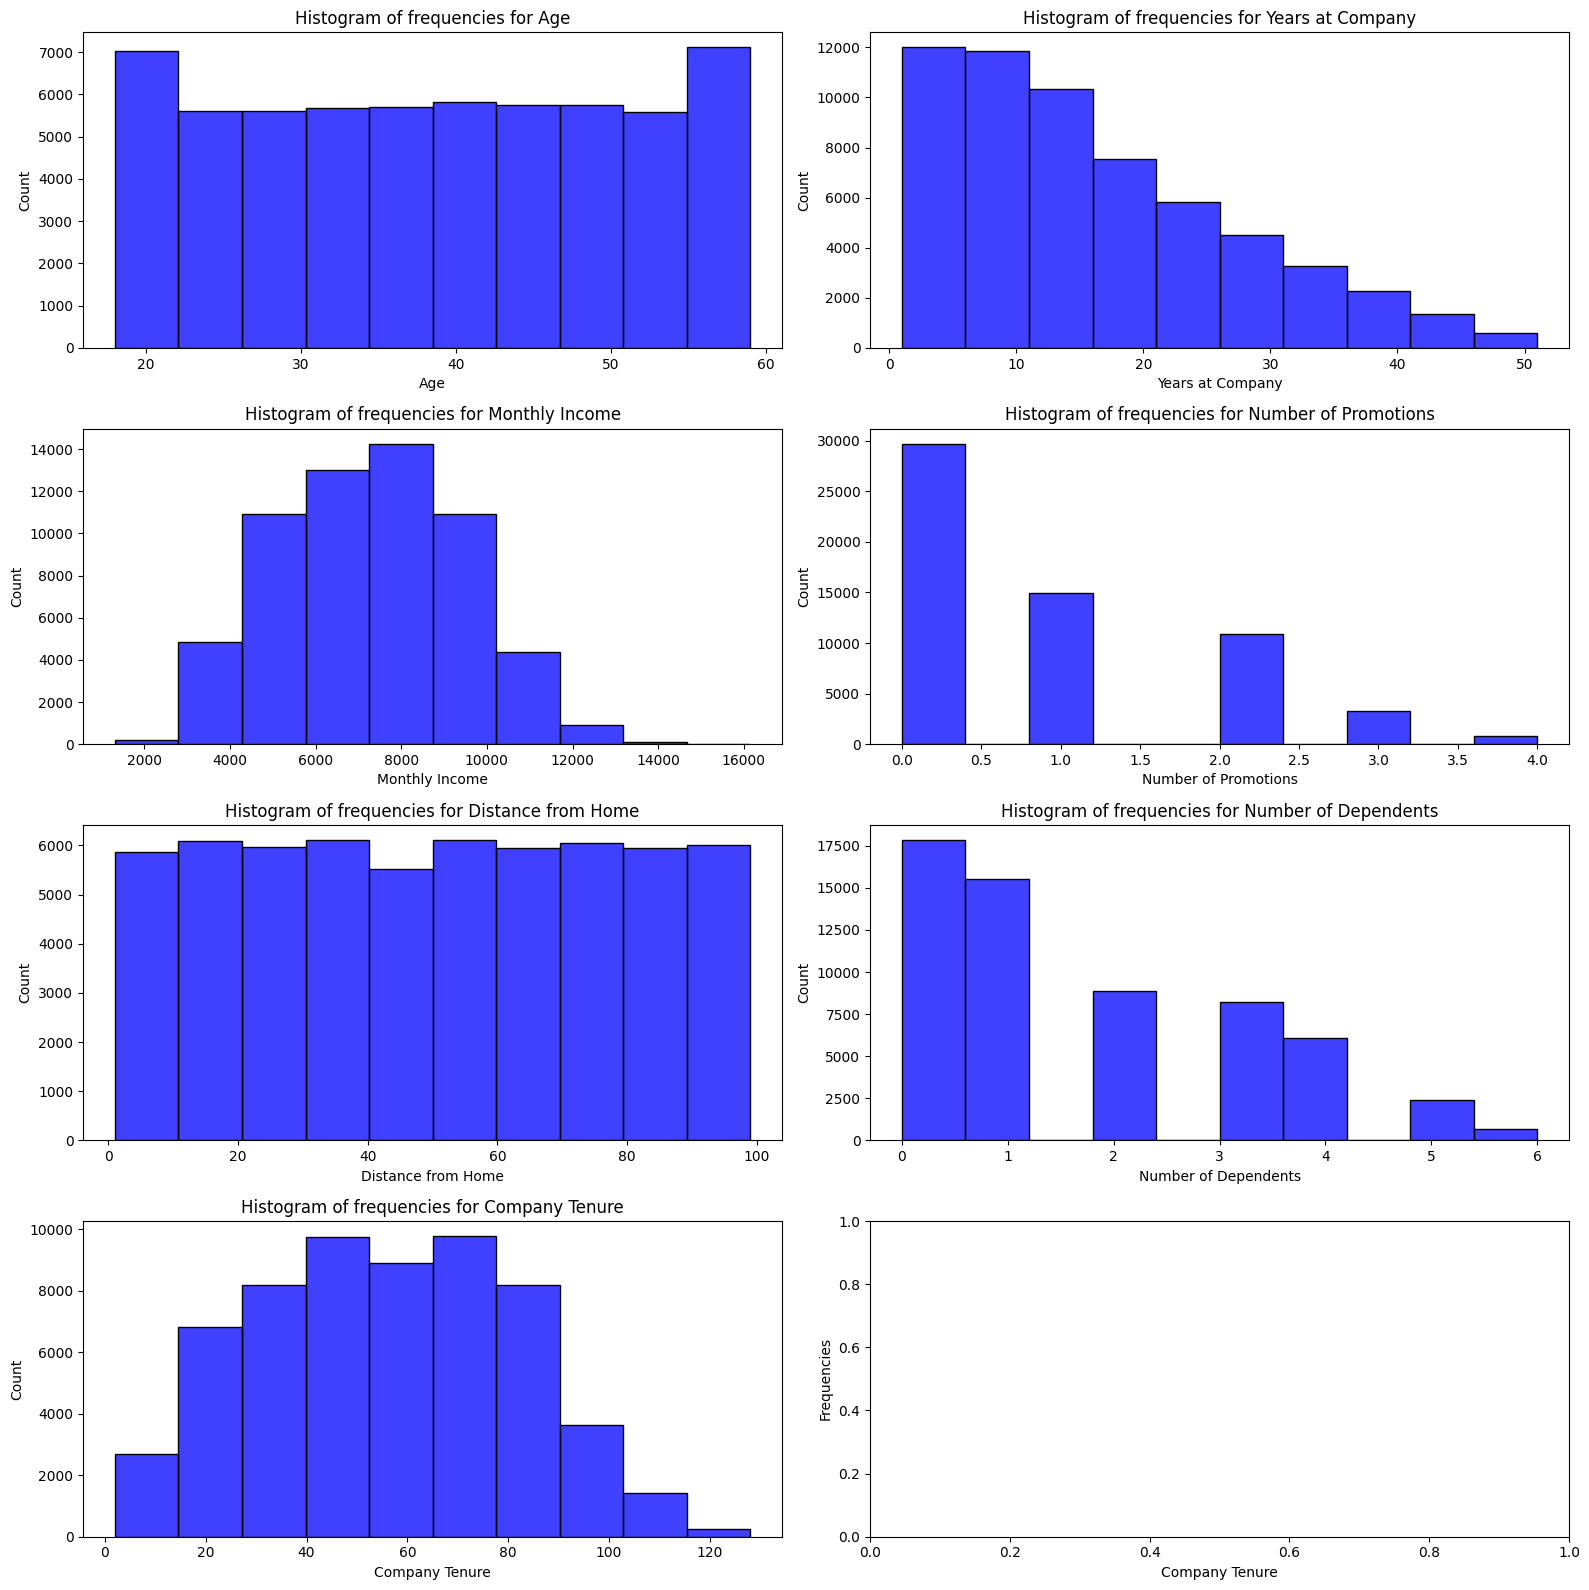

In [13]:
# plot the histogram of frequencies for numerical features
dp.hist_frequencies(dataset, num_cols, bins = 10)

---
**Comment:** These plots show frequancy distributions of all numerical features. 
- Monthly income and company tenure have plots similar to normal distribution with a peak at the center and diminishing frequencies near the ends.
- Age distribution is quite plain but with peaks at the very beginning (around 20 years) and at the very end (around 60 years)
- Years at company has a decreasing plot.
- Number of promotions and Number of dependents also have decreasing plots with peaks in 0. 
- Distance from Home has plain distributin around 6000 examples of each value of distance.  
---

In [14]:
# check the behavior of categorical features
dp.get_categorical_instances(dataset, cat_cols)


***** Gender ******
Gender
Male      32739
Female    26859
Name: count, dtype: int64

***** Job Role ******
Job Role
Technology    15507
Healthcare    13642
Education     12490
Media          9574
Finance        8385
Name: count, dtype: int64

***** Work-Life Balance ******
Work-Life Balance
Good         22528
Fair         18046
Excellent    10719
Poor          8305
Name: count, dtype: int64

***** Job Satisfaction ******
Job Satisfaction
High         29779
Very High    12111
Medium       11817
Low           5891
Name: count, dtype: int64

***** Performance Rating ******
Performance Rating
Average          35810
High             11888
Below Average     8950
Low               2950
Name: count, dtype: int64

***** Overtime ******
Overtime
No     40148
Yes    19450
Name: count, dtype: int64

***** Education Level ******
Education Level
Bachelor’s Degree    17826
Associate Degree     14915
Master’s Degree      12020
High School          11748
PhD                   3089
Name: count, dtype:

---
**Comment:** Here we can see the number of rows with different values of categorical features.

---

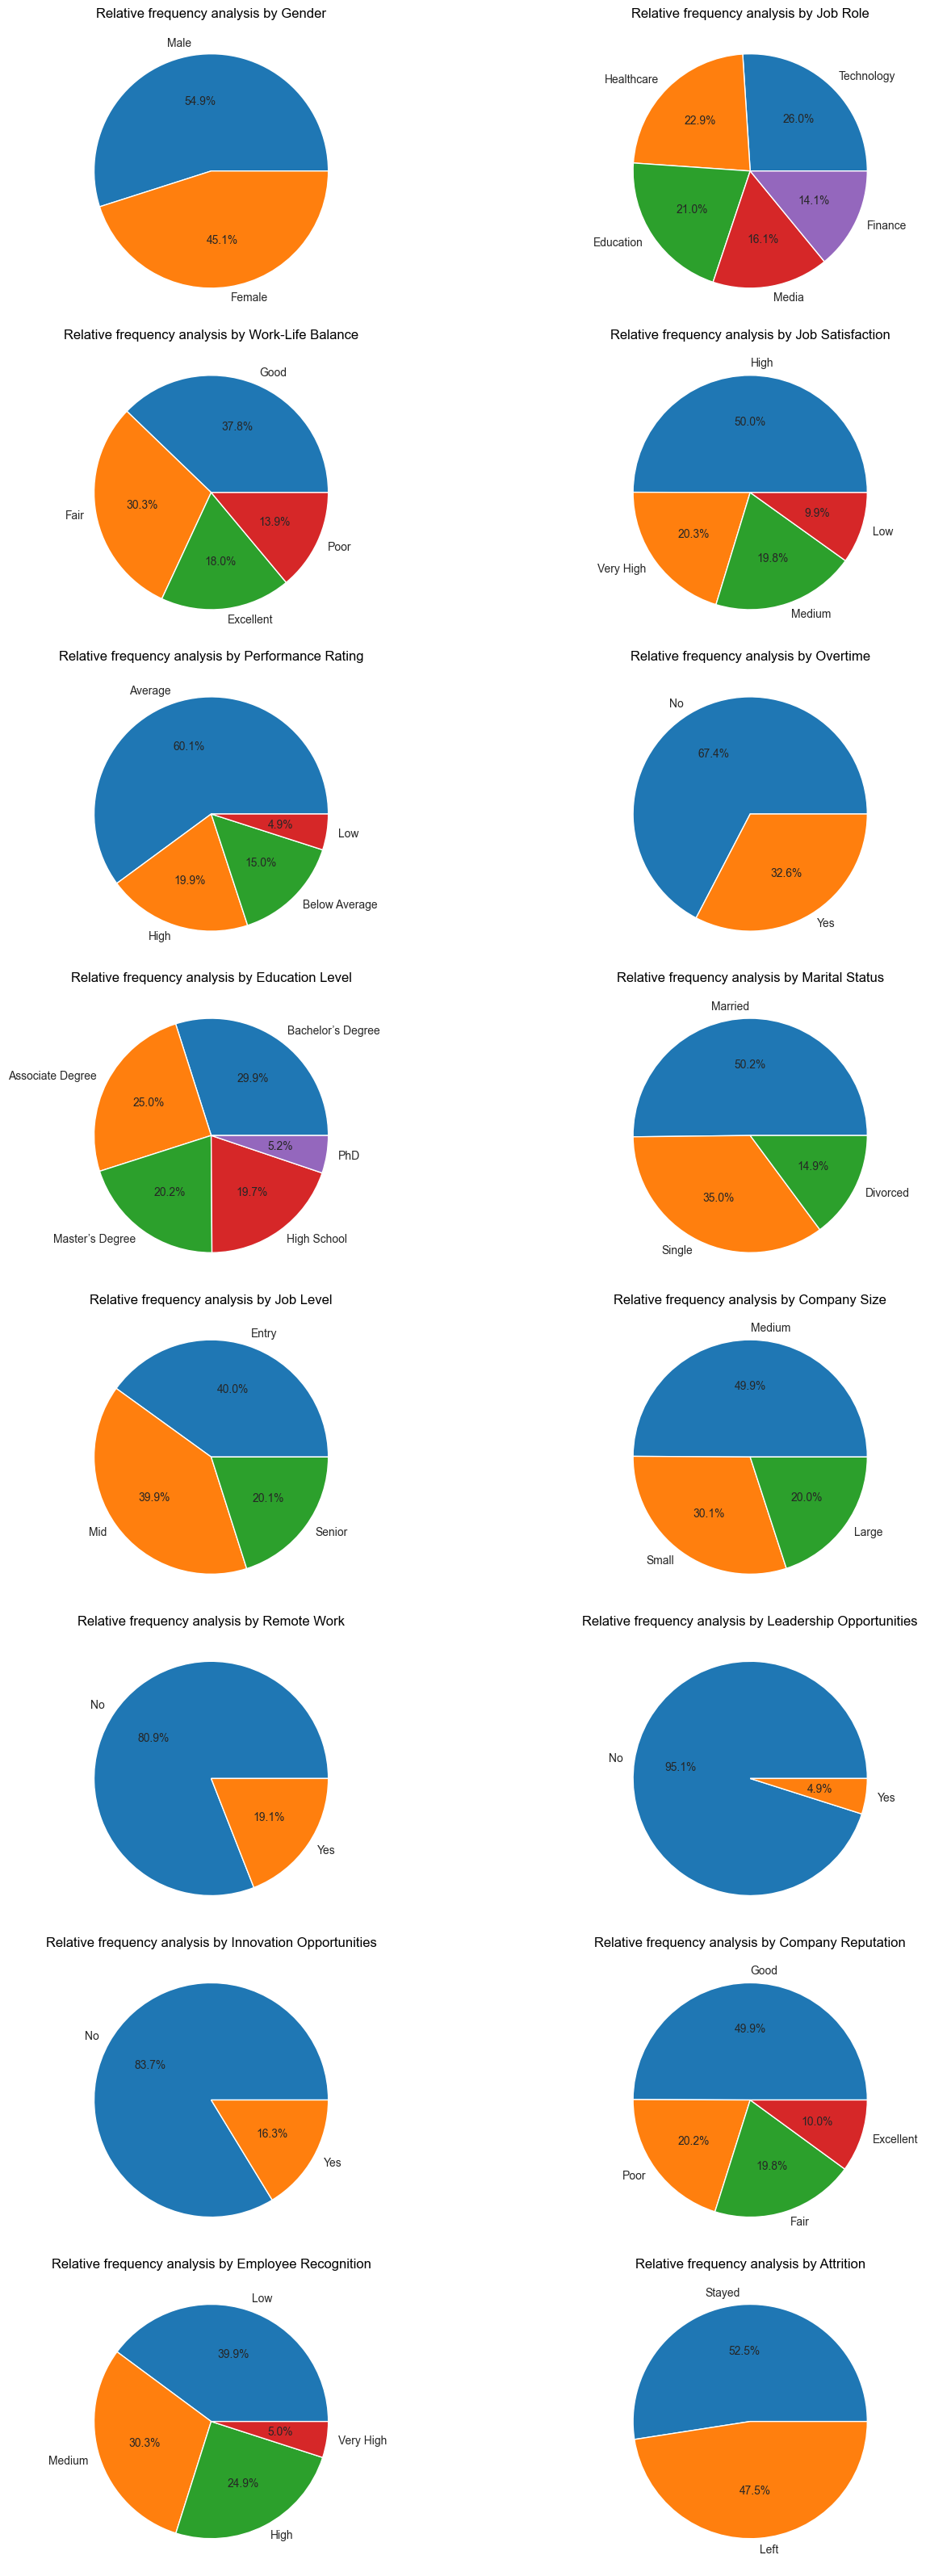

In [15]:
# iteratively pie chart
dp.iter_piechart(dataset, cat_cols)

---
**Comment:** Pie charts show relative distributions of values of each categorical feature. 
- For example, we can see that almost 50% of emloyees are maried, 35% are single and the rest 15% are divorced.
---

#### 4. Data preprocessing

In [16]:
# split independent and dependent variables
x = dataset.loc[:, dataset.columns != "Attrition"]
y = dataset["Attrition"]

In [17]:
x.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,Married,3,Mid,Medium,74,No,No,No,Poor,Low
3,36,Female,7,Education,3989,Good,High,High,1,No,...,Single,2,Mid,Small,50,Yes,No,No,Good,Medium
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium


In [18]:
print("Dimension of features = ", x.shape)
print("Dimension of target = ", y.shape)

Dimension of features =  (59598, 22)
Dimension of target =  (59598,)


Split train and test set

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (47678, 22)
Y-train:  47678
X-test dim:  (11920, 22)
Y-test:  11920


Transforming the numerical and categorical features  


* Numerical features: 
 ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']
* Categorical features: 
 ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']  

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer(
    (StandardScaler(), ["Monthly Income", "Company Tenure"]),  
    (RobustScaler(), ['Age', 'Years at Company', 'Number of Promotions', 
                      'Distance from Home', 'Number of Dependents']),
    (OneHotEncoder(handle_unknown="ignore"), ['Gender', 'Job Role', 'Work-Life Balance', 
                                              'Job Satisfaction', 'Performance Rating', 
                                              'Overtime', 'Education Level', 'Marital Status', 
                                              'Job Level', 'Company Size', 'Remote Work', 
                                              'Leadership Opportunities', 'Innovation Opportunities', 
                                              'Company Reputation', 'Employee Recognition'])    
)

---
**Comment:** Here we transformes our data. 
- Numerical features that has normal distributions are with StandardScaler()
- Other numerical features are with RobustScaler()
- Categorical features are with OneHotEncoder to have their values encoded as numbers. 

---

In [21]:
# transformer will learn only from training data
transformer.fit(x_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Monthly Income', 'Company Tenure']),
                                ('robustscaler', RobustScaler(),
                                 ['Age', 'Years at Company',
                                  'Number of Promotions', 'Distance from Home',
                                  'Number of Dependents']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Job Role', 'Work-Life Balance',
                                  'Job Satisfaction', 'Performance Rating',
                                  'Overtime', 'Education Level',
                                  'Marital Status', 'Job Level', 'Company Size',
                                  'Remote Work', 'Leadership Opportunities',
                                  'Innovation Opportunities',
                                  'Company Reputation',
                                  'Employee Recognition'])])

In [22]:
# transformer will transform the train and test data
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [23]:
x_train

array([[ 2.27080905, -0.02508457,  0.61904762, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.83121739,  0.84259817,  0.52380952, ...,  0.        ,
         0.        ,  0.        ],
       [-0.61767396, -0.65612657, -0.42857143, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.19704451,  0.36931667, -0.71428571, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.0593433 , -0.81388707,  0.61904762, ...,  0.        ,
         0.        ,  0.        ],
       [-1.52020866,  0.05379568,  0.19047619, ...,  1.        ,
         0.        ,  0.        ]])

In [24]:
y_train

33600      Left
31871      Left
36198      Left
21050      Left
47543      Left
          ...  
45891    Stayed
52416      Left
42613    Stayed
43567      Left
2732     Stayed
Name: Attrition, Length: 47678, dtype: object

---
**Comment:** This is the transformed data.

---

In [25]:
classes = np.unique(y)
print("Avalilable classes: ", classes)

Avalilable classes:  ['Left' 'Stayed']


---
**Comment:** Classes that we can have as a result of classification.

---

#### 5. Building Models

Benchmark for Models
* KNN
* SVM
* Random Forest
* XGBoost Classifier
* LightGBM Classifier

In [26]:
%reload_ext autoreload
%autoreload 2

KNN Classifier

In [29]:
from scripts.classifiers import KNNModel
import time

# train model
sttrain_knn = time.time()
knn = KNNModel()
knn_model = knn.train(x_train, y_train)

# calculate time
ettrain_knn = time.time()
ttrain_knn = ettrain_knn - sttrain_knn
print(f"Time of training KNN: {ttrain_knn:.3f} seconds")

C:\Users\gonch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.67765    0.67771292 0.69105244 0.69105245        nan 0.67970541
        nan 0.69279317 0.67765    0.67771292 0.69105244 0.69105245
 0.68027172 0.67970541 0.69310778 0.69279317 0.67765    0.67771292
 0.69105244 0.69105245 0.68027172 0.67970541 0.69310778 0.69279317]
  warnings.warn(


Best KNN Parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Time of training KNN: 3791.493 seconds


In [30]:
knn_model

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=7)

In [31]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", knn_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", knn_model.predict(x_test[0:10]))

real values in train:  ['Left' 'Left' 'Left' 'Left' 'Left' 'Left' 'Stayed' 'Left' 'Stayed' 'Left']
predicted values in train:  ['Left' 'Left' 'Left' 'Stayed' 'Left' 'Left' 'Stayed' 'Left' 'Stayed'
 'Left']
real values in test:  ['Left' 'Left' 'Left' 'Left' 'Left' 'Stayed' 'Left' 'Left' 'Stayed'
 'Stayed']
predicted values in test:  ['Left' 'Left' 'Left' 'Left' 'Left' 'Stayed' 'Left' 'Left' 'Stayed'
 'Stayed']


---
**Comment:** Here we can see that for train predictions 1 of 10 was predicted incorrect but for test everything is correct.

---

In [32]:
# deploy knn model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="knn_v1.pkl", model=knn_model)

In [33]:
# evaluate knn model
from scripts.evaluator import EvalClassifier
rec_knn = DeployClassifier(path = "models").load_model(filename="knn_v1.pkl")
eval_knn = EvalClassifier(model = rec_knn)

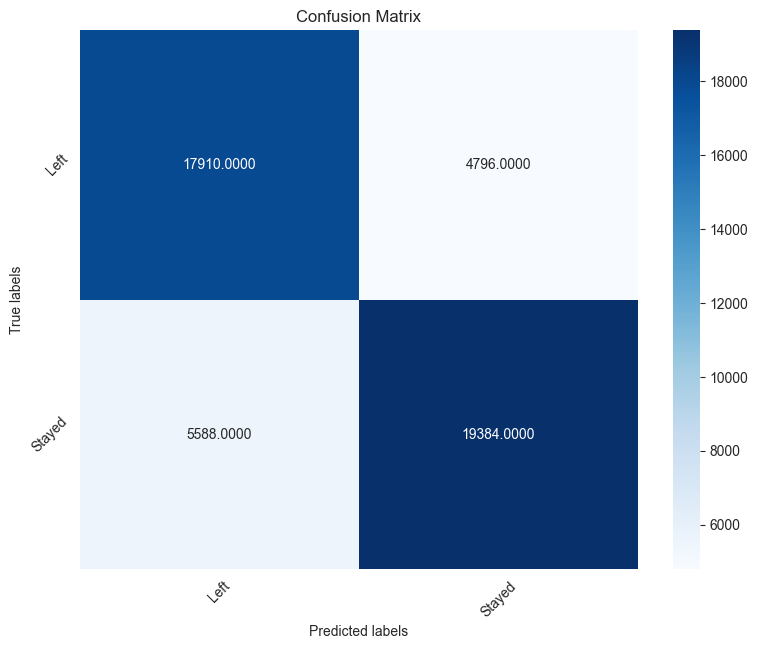

In [34]:
# get confusion matrix in training
y_pred = rec_knn.predict(x_train)
cmknn_train = eval_knn.get_confusion_matrix(y_train.values, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_train, classes)

---
**Comment:** This matrix shows numbers of correctly defined values both for 'left' and 'stayed' (for train part). 
- 'left' values that were predicted right : 17 910 (79%)
- 'left' values that were predicted wrong : 4 796 (21%)
- 'stayed' values that were predicted right : 19 384 (78%)
- 'stayed' values that were predicted wrong : 5 588 (22%)

---

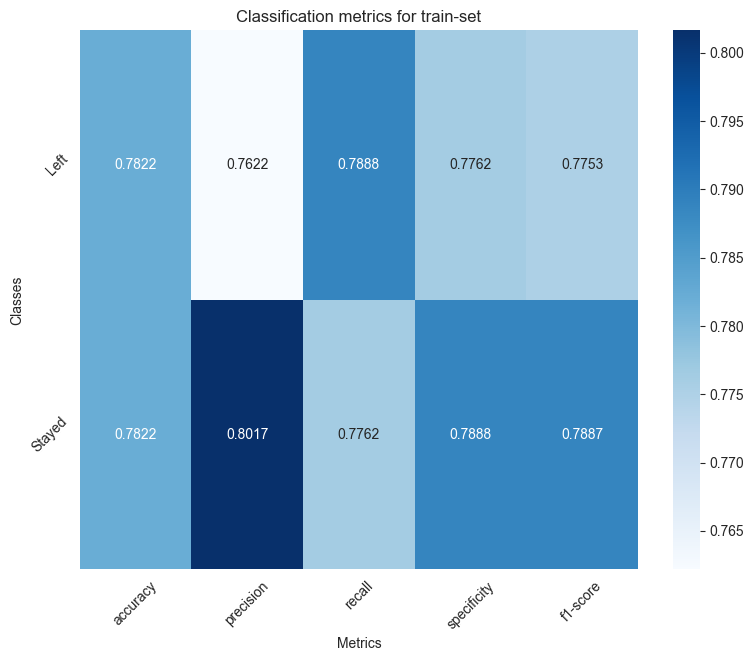

In [35]:
metrics_train_knn = eval_knn.calculate_metrics_by_class(cmknn_train, classes)
eval_knn.plot_metrics_by_class(metrics_train_knn, "Classification metrics for train-set")

---
**Comment:** Classification metrics:
- accuracy : the ratio of correctly predicted values among all predictions.
$$ \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Number of Observations}} $$
- precision : the ratio of correctly predicted positive observations to the total predicted positives.
$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$
- recall : it measures how well the model identifies true positive cases.
$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$
- specificity : measures how well the model identifies true negative cases
$$ \text{Specificity} = \frac{\text{True Negatives}}{\text{True Negatives} + \text{False Positives}} $$
- f1-score : the weighted average of precision and recall, providing a balance between them.
$$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

**For our trai data** : every metric has value around 78 which is quite good.

---

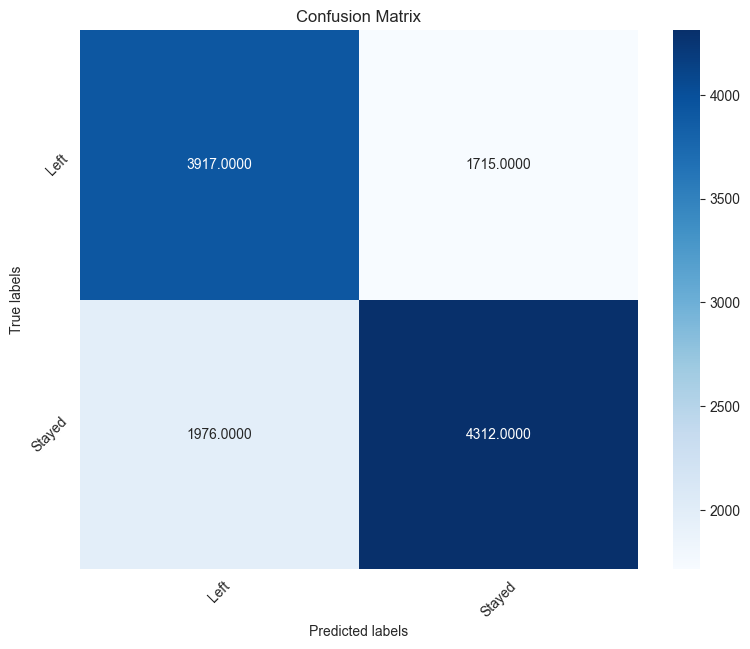

In [36]:
# get confusion matrix in testing
y_pred = rec_knn.predict(x_test)
cmknn_test = eval_knn.get_confusion_matrix(y_test, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_test, classes)

---
**Comment:** This matrix shows numbers of correctly defined values both for 'left' and 'stayed' (for test part). 
- 'left' values that were predicted right : 3 917 (69%)
- 'left' values that were predicted wrong : 1 715 (31%)
- 'stayed' values that were predicted right : 4 312 (69%)
- 'stayed' values that were predicted wrong : 1 976 (31%)

---

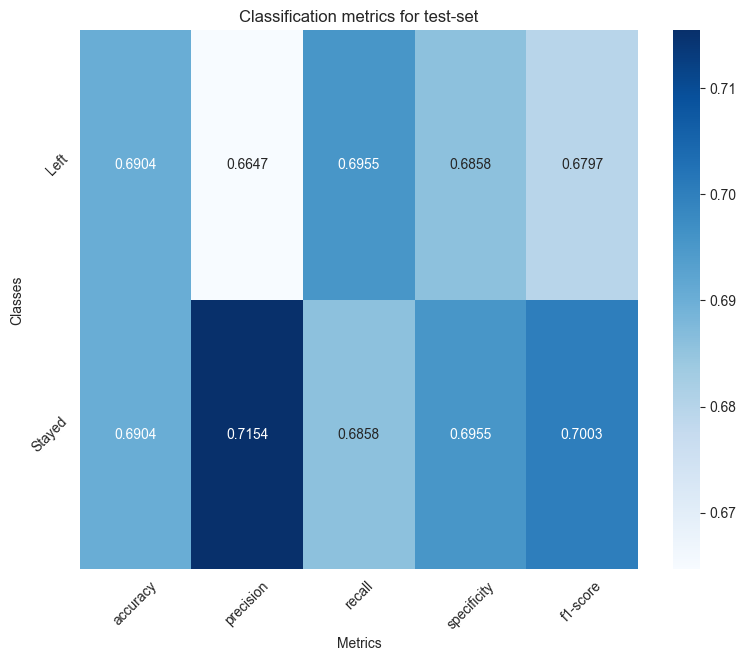

In [37]:
metrics_test_knn = eval_knn.calculate_metrics_by_class(cmknn_test, classes)
eval_knn.plot_metrics_by_class(metrics_test_knn, "Classification metrics for test-set")

---
**Comment:** For test set all metrics are around 69-71 which is lower than for train set that can be a sign of overfitting (in our case it way be acceptable).

---

In [38]:
# calculate the metrics for whole test set
eval_knn.calculate_metrics_xall(cmknn_test, metrics_test_knn)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.690352,0.690067,0.69062,0.69062,0.690012


---
**Comment:** here we can see metrics for whole test set. The model's performance is consistent across all metrics, with values around 0.69. The balance between these metrics indicates that the model is relatively stable in terms of both false positives and false negatives.

---

SVM Classifier

In [27]:
from scripts.classifiers import SVMModel
import time

# train model
sttrain_svm = time.time()
svm = SVMModel()
svm_model = svm.train(x_train, y_train)

# calculate time
ettrain_svm = time.time()
ttrain_svm = ettrain_svm - sttrain_svm
print(f"Time of training SVM: {ttrain_svm:.3f} seconds")

C:\Users\gonch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best SVM Parameters: {'C': 1, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Time of training SVM: 83003.925 seconds


In [28]:
svm_model

SVC(C=1, class_weight='balanced', degree=2, gamma='auto')

In [29]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", svm_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", svm_model.predict(x_test[0:10]))

real values in train:  ['Left' 'Left' 'Left' 'Left' 'Left' 'Left' 'Stayed' 'Left' 'Stayed' 'Left']
predicted values in train:  ['Left' 'Left' 'Left' 'Stayed' 'Left' 'Left' 'Left' 'Left' 'Stayed' 'Left']
real values in test:  ['Left' 'Left' 'Left' 'Left' 'Left' 'Stayed' 'Left' 'Left' 'Stayed'
 'Stayed']
predicted values in test:  ['Stayed' 'Left' 'Left' 'Left' 'Left' 'Stayed' 'Left' 'Left' 'Stayed'
 'Stayed']


---
**Comment:** for this classifier we can see that there are two mistakes in train and one for test.

---

In [30]:
# deploy svm model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="svm_v1.pkl", model=svm_model)

In [31]:
# evaluate svm model
from scripts.evaluator import EvalClassifier
rec_svm = DeployClassifier(path = "models").load_model(filename="svm_v1.pkl")
eval_svm = EvalClassifier(model = rec_svm)

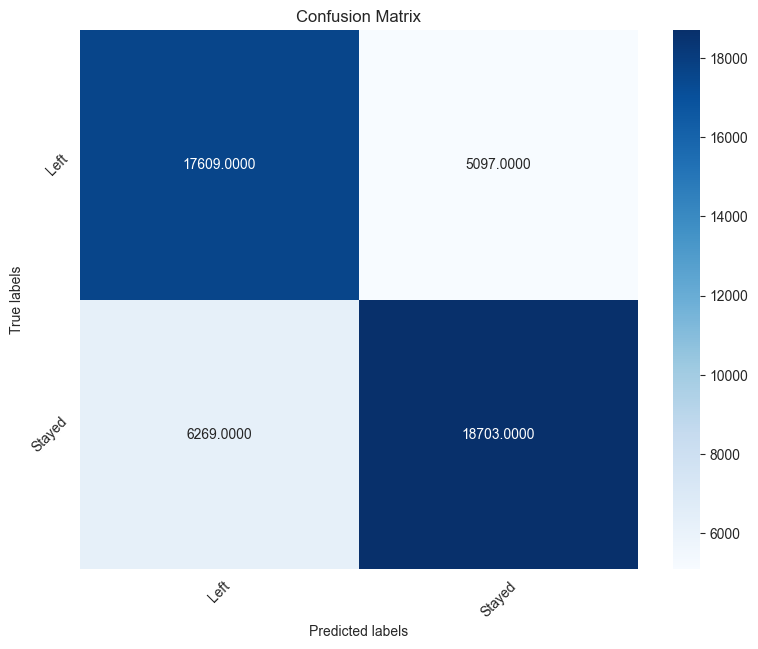

In [32]:
# get confusion matrix in training
y_pred = rec_svm.predict(x_train)
cmsvm_train = eval_svm.get_confusion_matrix(y_train.values, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_train, classes)

---
**Comment:** This matrix shows numbers of correctly defined values both for 'left' and 'stayed' (for train part). 
- 'left' values that were predicted right : 17 609 (77%)
- 'left' values that were predicted wrong : 5 097 (23%)
- 'stayed' values that were predicted right : 18 703 (75%)
- 'stayed' values that were predicted wrong : 6 269 (25%)

The results are worse comparing to previous classifier.

---

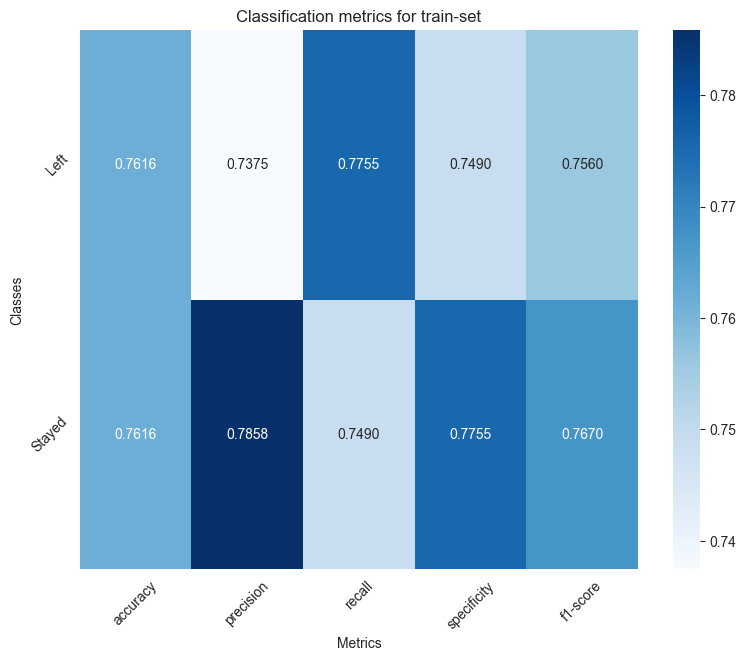

In [33]:
metrics_train_svm = eval_svm.calculate_metrics_by_class(cmsvm_train, classes)
eval_svm.plot_metrics_by_class(metrics_train_svm, "Classification metrics for train-set")

---
**Comment:** For train set metrics are also worse than for preivous classifier. Here they are around 0.75

---

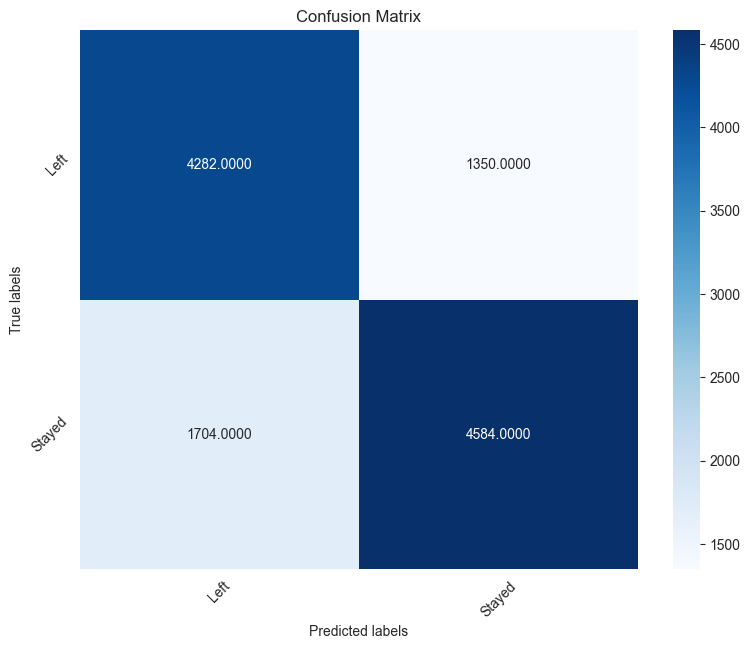

In [35]:
# get confusion matrix in testing
y_pred = rec_svm.predict(x_test)
cmsvm_test = eval_svm.get_confusion_matrix(y_test, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_test, classes)

---
**Comment:** This matrix shows numbers of correctly defined values both for 'left' and 'stayed' (for test part). 
- 'left' values that were predicted right : 4 282 (76%)
- 'left' values that were predicted wrong : 1 350 (24%)
- 'stayed' values that were predicted right : 4 584 (73%)
- 'stayed' values that were predicted wrong : 1 704 (27%)

For test set svm-classifier shows better results comparing to knn-classifier.

---

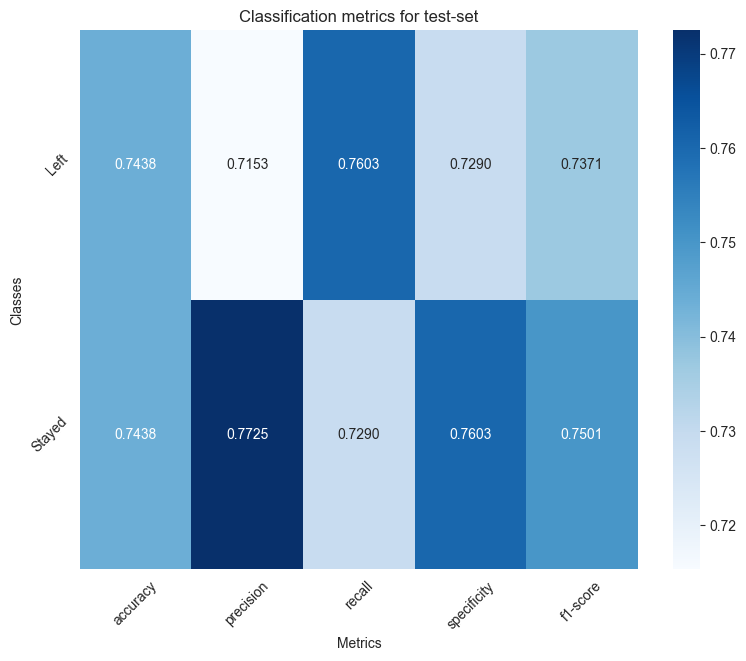

In [36]:
metrics_test_svm = eval_svm.calculate_metrics_by_class(cmsvm_test, classes)
eval_svm.plot_metrics_by_class(metrics_test_svm, "Classification metrics for test-set")

---
**Comment:** All metrics are better for testing than previously.

---

In [37]:
# calculate the metrics for whole test set
eval_svm.calculate_metrics_xall(cmsvm_test, metrics_test_svm)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.743792,0.743917,0.744653,0.744653,0.743627


---
**Comment:** For whole test set all values are around 0.74 which is quite decent. 

---

Random Forest Classifier

In [38]:
from scripts.classifiers import RandomForestModel
import time

# train model
sttrain_rf = time.time()
rf = RandomForestModel()
rf_model = rf.train(x_train, y_train)

# calculate time
ettrain_rf = time.time()
ttrain_rf = ettrain_rf - sttrain_rf
print(f"Time of training Random Forest: {ttrain_rf:.3f} seconds")

Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 40}
Time of training Random Forest: 589.399 seconds


In [39]:
rf_model

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=10,
                       n_estimators=40)

In [40]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", rf_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", rf_model.predict(x_test[0:10]))

real values in train:  ['Left' 'Left' 'Left' 'Left' 'Left' 'Left' 'Stayed' 'Left' 'Stayed' 'Left']
predicted values in train:  ['Left' 'Left' 'Left' 'Stayed' 'Left' 'Left' 'Left' 'Left' 'Stayed' 'Left']
real values in test:  ['Left' 'Left' 'Left' 'Left' 'Left' 'Stayed' 'Left' 'Left' 'Stayed'
 'Stayed']
predicted values in test:  ['Stayed' 'Left' 'Stayed' 'Left' 'Left' 'Stayed' 'Left' 'Left' 'Stayed'
 'Stayed']


---
**Comment:** for train set there are 2 wrong out of 10 results. For test set also 2 out of 10.

---

In [41]:
# deploy rf model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="rf_v1.pkl", model=rf_model)

In [42]:
# evaluate rf model
from scripts.evaluator import EvalClassifier
rec_rf = DeployClassifier(path = "models").load_model(filename="rf_v1.pkl")
eval_rf = EvalClassifier(model = rec_rf)

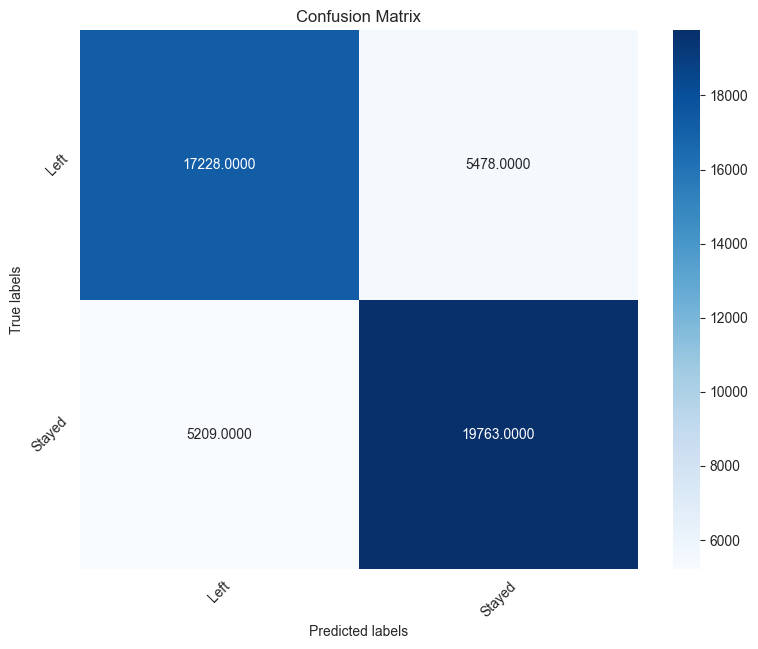

In [43]:
# get confusion matrix in training
y_pred = rec_rf.predict(x_train)
cmrf_train = eval_rf.get_confusion_matrix(y_train.values, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_train, classes)

---
**Comment:** This matrix shows numbers of correctly defined values both for 'left' and 'stayed' (for train part). 
- 'left' values that were predicted right : 17 228 (76%)
- 'left' values that were predicted wrong : 5 478 (24%)
- 'stayed' values that were predicted right : 19 763 (79%)
- 'stayed' values that were predicted wrong : 5 209 (21%)

These results are worse than for knn-classifier and at similar to svm-classifier ('left' values are classified worse, 'stayed' better).

---

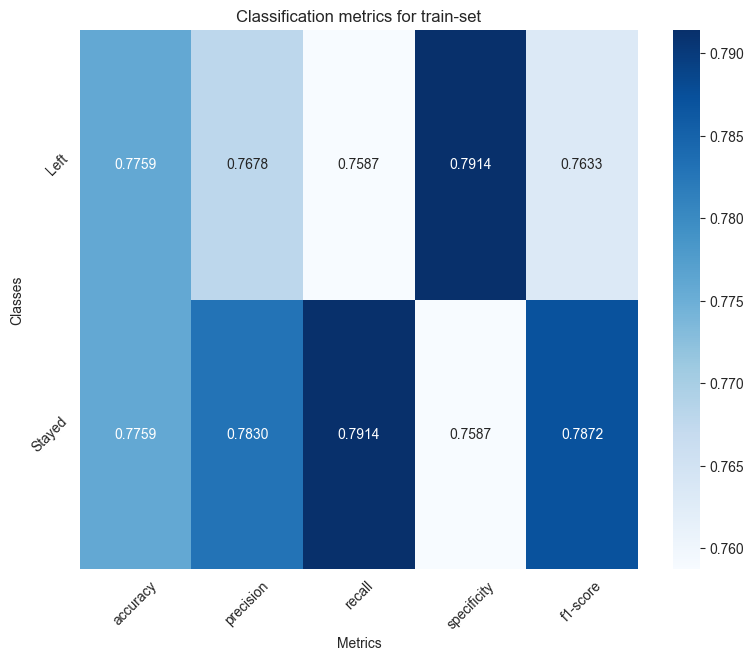

In [45]:
metrics_train_rf = eval_rf.calculate_metrics_by_class(cmrf_train, classes)
eval_rf.plot_metrics_by_class(metrics_train_rf, "Classification metrics for train-set")

---
**Comment:** all metrics have pretty high value.

---

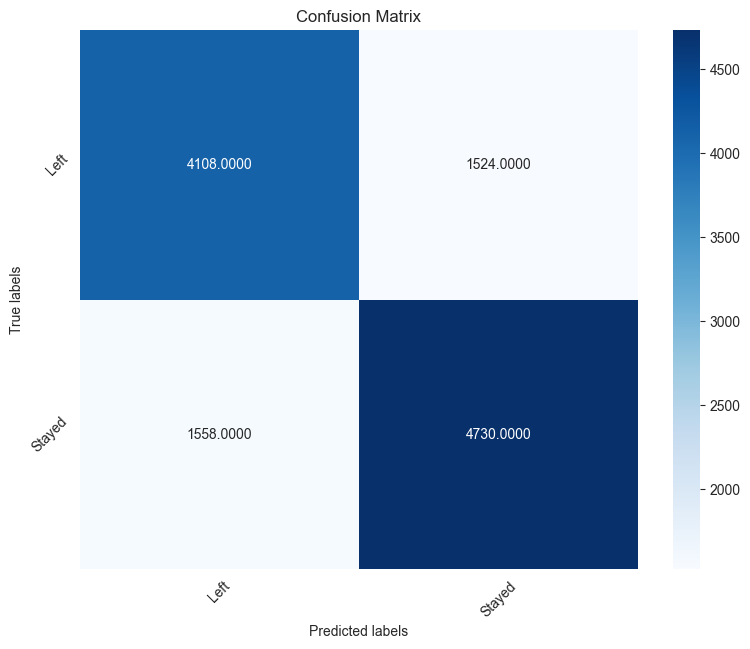

In [47]:
# get confusion matrix in testing
y_pred = rec_rf.predict(x_test)
cmrf_test = eval_rf.get_confusion_matrix(y_test, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_test, classes)

---
**Comment:** This matrix shows numbers of correctly defined values both for 'left' and 'stayed' (for test part). 
- 'left' values that were predicted right : 4 108 (73%)
- 'left' values that were predicted wrong : 1 524 (27%)
- 'stayed' values that were predicted right : 4 730 (75%)
- 'stayed' values that were predicted wrong : 1 558 (25%)

Comparing to svm-classifier 'left' values are classified worse and 'stayed' values better.

---

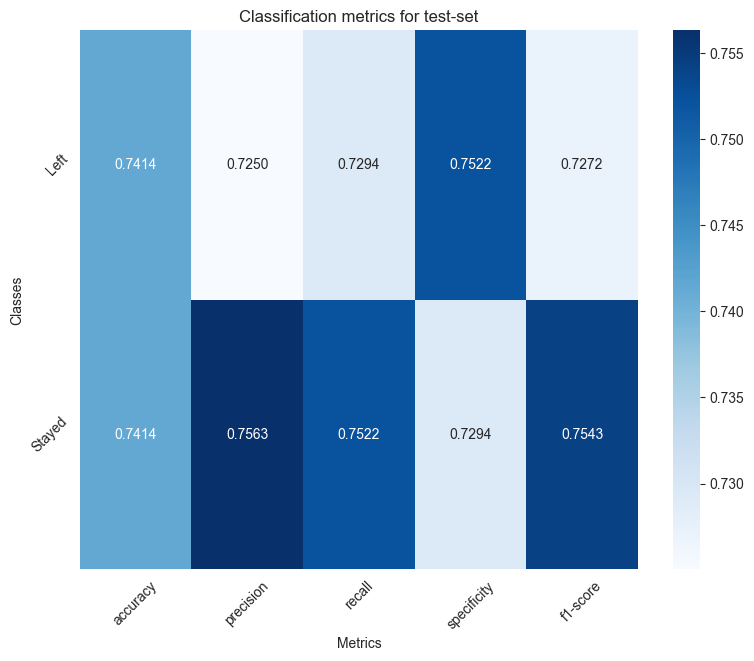

In [48]:
metrics_test_rf = eval_rf.calculate_metrics_by_class(cmrf_test, classes)
eval_rf.plot_metrics_by_class(metrics_test_rf, "Classification metrics for test-set")

---
**Comment:** Metrics are lower than for train set.

---

In [49]:
# calculate the metrics for whole test set
eval_rf.calculate_metrics_xall(cmrf_test, metrics_test_rf)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.741443,0.740671,0.740815,0.740815,0.740737


---
**Comment:** all values are good.

---

### KNN CLASSIFIER VS CVM CLASSIFIER VS RANDOM FOREST CLASSIFIER

Let's compare mean-metrics for all 3 classifiers.


|     | accuracy | precision  | recall    | specificity| f1-score | time for training 
|-----|----------|------------|-----------|------------|----------|------------------
| KNN | 0.690352 | 0.690067   | 0.69062   | 0.69062    | 0.690012 | 1 h 3 min
| SVM | 0.743792 | 0.743917   | 0.744653  | 0.744653   | 0.743627 | 23 h
| RF  | 0.741443 | 0.740671   | 0.740815  | 0.740815   | 0.740737 | 10 min

For all metrics SVM classifier has the highest values while KNN the lowes. So we can say that the best is SVM, the 2nd is Random Forest and the last one is KNN.

However SVM classifier work too long, while Random Forest worked 10 minutes and its metrics are not so lower comparing to SVM.
So the choice between these two depends on the needs.

---
**CONCLUSION**

In this work, we performed classification of employees by their attrition. Initially, we explored and cleaned the dataset to ensure that all values were suitable for analysis. This process included plotting numerical features, creating pie charts for categorical features, detecting and handling missing values, removing duplicates, and transforming columns as needed.

We then trained three different classifiers: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Random Forest. By analyzing the performance of each model, we concluded that SVM and Random Forest were the most effective. The final choice between them depends on whether we prioritize higher precision or faster training time.

---